<a href="https://colab.research.google.com/github/guilhermeterenciani/IA/blob/main/10_ema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exponential weighted averages

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [ ]:
TickerA='GOOG'
TickerB='FLRY3.SA'
TickerC='LREN3.SA'
prices=pd.DataFrame()
#tickers = [TickerA, TickerB, TickerC]
tickers = [TickerA]
for t in tickers:
    prices[t]=yf.download('PETR4.SA', start = '2012-01-01', end='2017-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


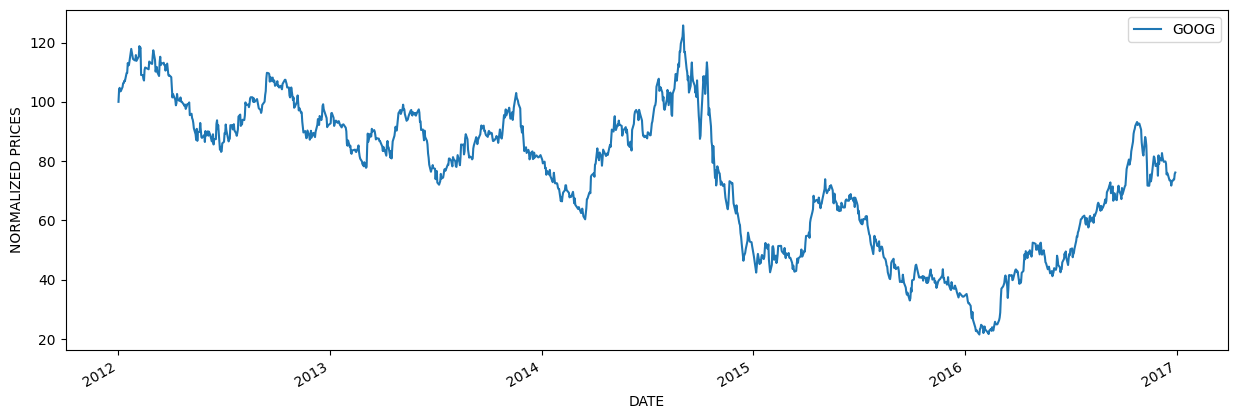

In [ ]:


(prices/prices.iloc[0]*100).plot(figsize=(15,5))
plt.ylabel('NORMALIZED PRICES')
plt.xlabel('DATE')
plt.savefig('petr4.pdf',format='pdf')
plt.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
plt.savefig('petr4.pdf',format='pdf')


<Figure size 640x480 with 0 Axes>

In [ ]:
prices.iloc[0]

GOOG    6.923897
Name: 2012-01-02 00:00:00, dtype: float64

In [ ]:
v = 1
n = len(prices)
beta = 0.90
vewa = []
vprice = []
for i in range(1,n):
    price=prices[tickers[0]][i]
    v = beta*v + (1-beta)*(price)
    v_hat = v/(1-beta**i)
    vprice.append(price)
    vewa.append(v_hat)
    #vewa.append(v)


In [ ]:
print(vewa)

[16.199310779571537, 11.489520399194017, 9.894562624477375, 9.103357806875456, 8.6556582353755, 8.378439160123019, 8.183212709302493, 8.048248946860156, 7.943228053484421, 7.890172352323748, 7.847544541753057, 7.844955936997118, 7.83592010361475, 7.828770470345085, 7.859541006233393, 7.896403580833522, 7.909515783602746, 7.911378189020774, 7.9092786534032316, 7.907450416557464, 7.919559990474631, 7.915212971321088, 7.914209733387119, 7.9220526584079565, 7.954594634840023, 7.977569130598681, 8.000334330204877, 7.952758851153906, 7.910437375471986, 7.863014547264947, 7.81705719898045, 7.801989511183688, 7.794165247415155, 7.782875003195256, 7.791227216758338, 7.794430985282473, 7.796644544252967, 7.79797372607478, 7.817782462892834, 7.849242741086785, 7.85435085667556, 7.831622640014371, 7.8186889684532135, 7.8106438484888905, 7.791102961323942, 7.764482599162119, 7.772918252335961, 7.793431411058161, 7.792158967264907, 7.795213125405528, 7.797958863111004, 7.801867457209671, 7.800195873

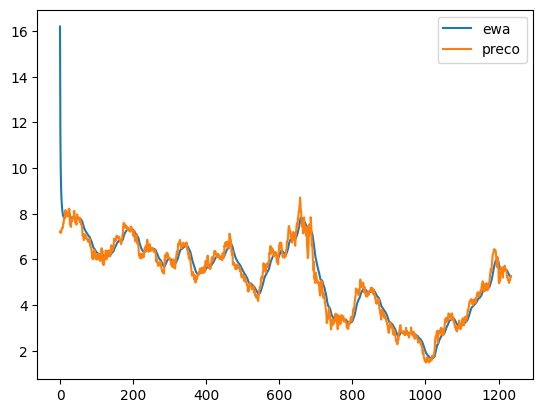

In [ ]:
plt.plot(range(len(vewa)),vewa,label='ewa')
plt.plot(range(len(vprice)),vprice,label='preco')
plt.legend()

# Comparando Valores de Beta

In [ ]:

# 1/(1-beta) = 10 dias
theta = prices[tickers[0]][0]
n = len(prices)
beta = 0.9
vewa90 = []
vprice = []
for i in range(n):
    price=prices[tickers[0]][i]
    theta = beta*theta + (1-beta)*(price)
    vprice.append(price)
    vewa90.append(theta)

In [ ]:
# 1/(1-beta) = 50 dias
theta = prices[tickers[0]][0]
n = len(prices)
beta = 0.98
vewa98 = []
vprice = []
for i in range(n):
    price=prices[tickers[0]][i]
    theta = beta*theta + (1-beta)*(price)
    vprice.append(price)
    vewa98.append(theta)

In [ ]:
# 1/(1-beta) = 2 dias
theta = prices[tickers[0]][0]
n = len(prices)
beta = 0.5
vewa50 = []
vprice = []
for i in range(n):
    price=prices[tickers[0]][i]
    theta = beta*theta + (1-beta)*(price)
    vprice.append(price)
    vewa50.append(theta)

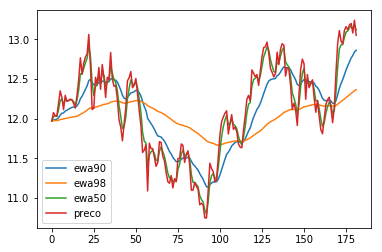

In [ ]:
plt.plot(range(n),vewa90,label='ewa90')
plt.plot(range(n),vewa98,label='ewa98')
plt.plot(range(n),vewa50,label='ewa50')
plt.plot(range(n),vprice,label='preco')
plt.legend()

# Entendendo Momentum no Gradiente


In [ ]:
import numpy as np

In [ ]:
v = np.arange(100)

In [ ]:
(v % 2 == 0)

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False])

In [ ]:
v = (v%2==0)*10
v

array([10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,
        0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0,
       10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,
        0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0,
       10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,
        0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0, 10,  0])

In [ ]:
def ewa(v,beta):
    theta = v[0]
    n = len(v)
    vret = []
    for i in range(n):
        theta = beta*theta + (1-beta)*(v[i])
        vret.append(theta)
    return vret


In [ ]:
ewa(v,0.9)

[10.0,
 9.0,
 9.1,
 8.19,
 8.370999999999999,
 7.533899999999999,
 7.78051,
 7.002459,
 7.3022131,
 6.57199179,
 6.914792611,
 6.223313349900001,
 6.6009820149100005,
 5.940883813419001,
 6.346795432077101,
 5.712115888869391,
 6.140904299982452,
 5.526813869984207,
 5.9741324829857865,
 5.376719234687208,
 5.839047311218487,
 5.2551425800966385,
 5.729628322086975,
 5.156665489878278,
 5.64099894089045,
 5.076899046801405,
 5.569209142121264,
 5.012288227909138,
 5.511059405118224,
 4.959953464606402,
 5.4639581181457615,
 4.9175623063311855,
 5.425806075698067,
 4.88322546812826,
 5.394902921315434,
 4.85541262918389,
 5.369871366265501,
 4.832884229638951,
 5.349595806675056,
 4.814636226007551,
 5.333172603406796,
 4.799855343066117,
 5.319869808759505,
 4.787882827883555,
 5.3090945450952,
 4.77818509058568,
 5.300366581527112,
 4.770329923374401,
 5.293296931036961,
 4.763967237933265,
 5.287570514139939,
 4.7588134627259455,
 5.282932116453351,
 4.754638904808016,
 5.27917501432

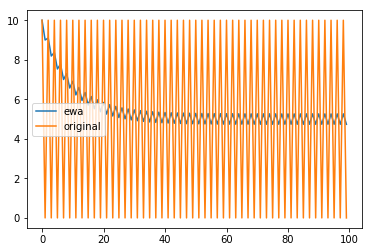

In [ ]:
plt.plot(range(len(v)),ewa(v,0.9),label = 'ewa')
plt.plot(range(len(v)),v,label='original')
plt.legend()


[Improving Generalization Performance by Switching from Adam to SGD](https://arxiv.org/pdf/1712.07628.pdf)

Baias Correction
$v_t = \beta v_{t+i} + (1-\beta)\theta_{t} * \frac{1}{1-\beta^{t}} $

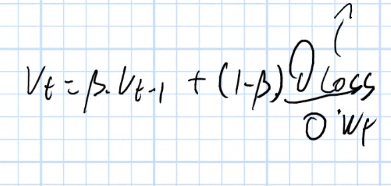

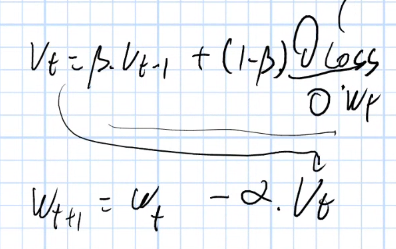

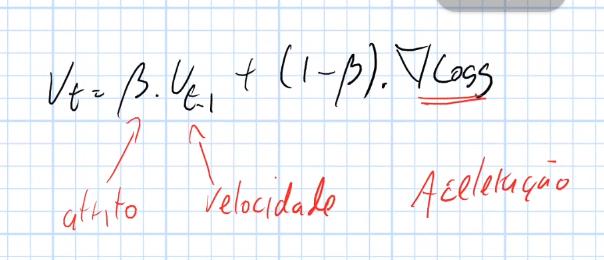

Rancou fora o $1-\beta$


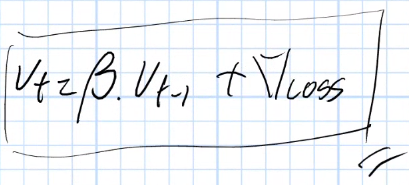

# Ada grad (Duchi et al 2011)

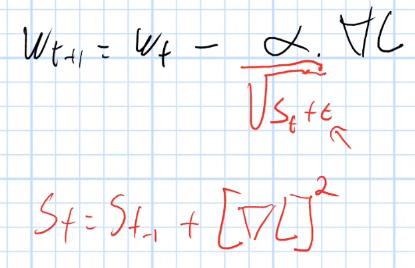

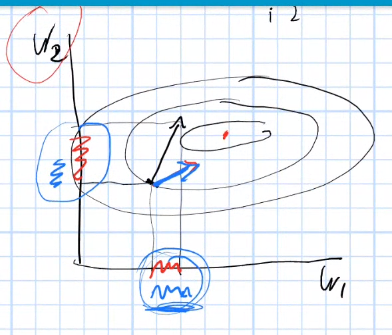

# RMS Prop (hinton et al 2012) -> Coursera

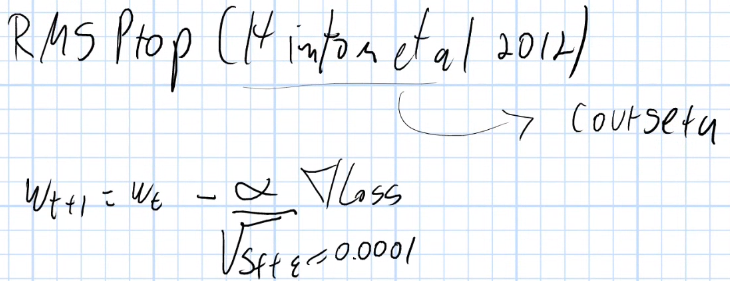
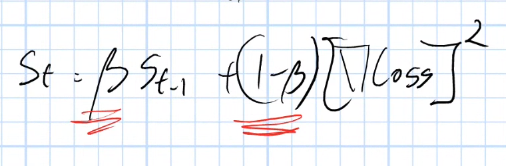

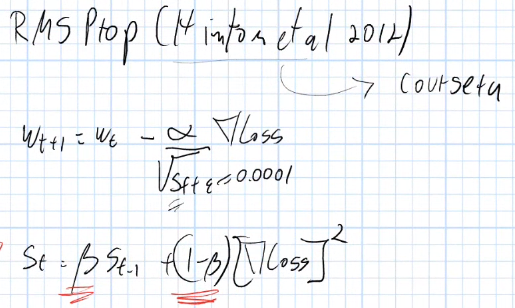

# Adam (Adaptative Momentum Estimation) (Kingma & Ba, 2014)

Momentum + RMSProp

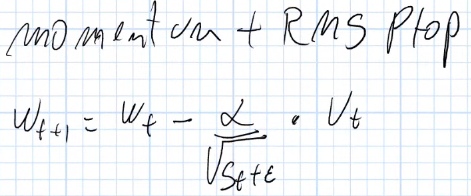

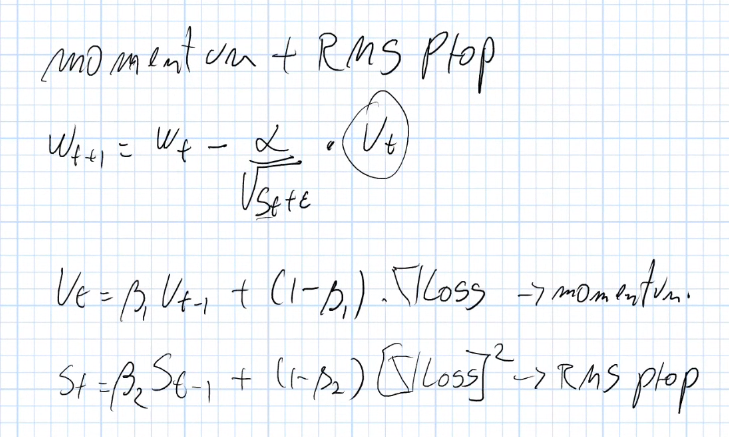

Com baias correction

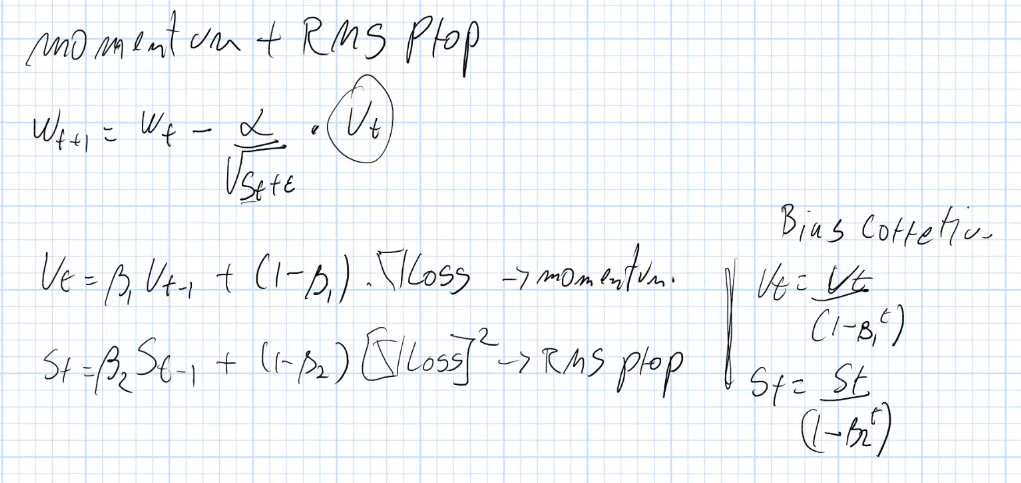

Igual Pytorch

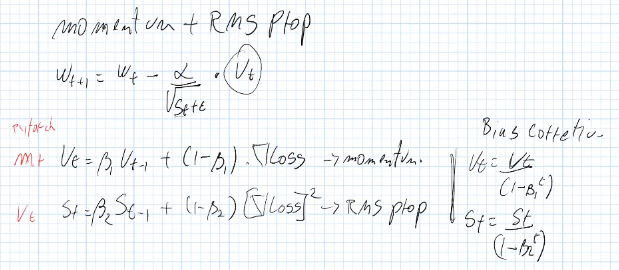

# Weight Decay (Regularization)

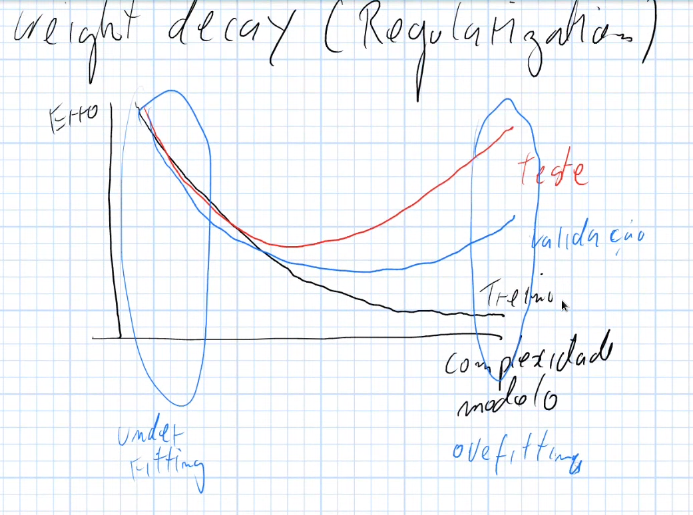

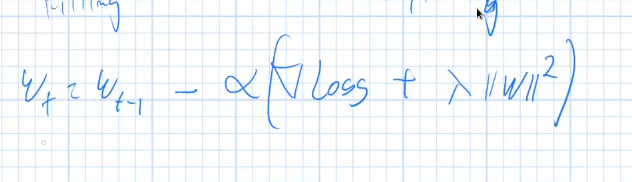

Quando usar Regularização (Olhar loss da validação)

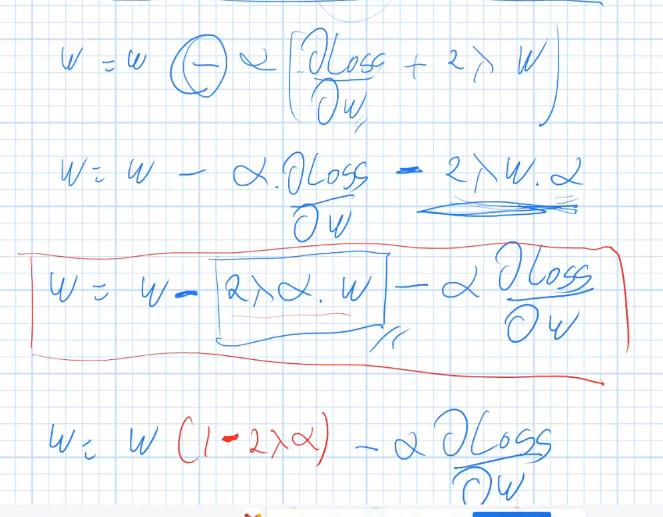

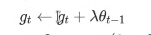